# 4_Preprocessing3 & Feature Selection

1. 범주형 변수 -> 원핫인코딩 or 라벨인코딩  
2. 수치형 변수 -> 0에 값이 많이 몰려있음 -> 표준화 or 정규화
3. 변수 선택  
4. bus_bts 어떻게 써먹을 수 있을지..?
5. 간단한 모델에 돌려보기 -> 최종 데이터셋 선정  
+이상치 처리? : 0이 너무 많아 이상치가 많이 생기는 것 같음 -> 처리 X (?)

In [1]:
%matplotlib inline
import os
from pathlib import Path
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import matplotlib.pylab as plt
import warnings

In [2]:
train = pd.read_csv("C:/Users/kimch/Desktop/229255_bus_riders_at_rush_hour_data/pre2_train")
train.set_index('id', inplace=True)
test = pd.read_csv("C:/Users/kimch/Desktop/229255_bus_riders_at_rush_hour_data/pre2_test")
test.set_index('id', inplace=True)

In [3]:
# DateTime Index랑 범주형 변수는 데이터셋에 저장이 안되는건가 다시 설정해줌
train["date"] = pd.to_datetime(train.date, format='%Y-%m-%d')
test["date"] = pd.to_datetime(test.date, format="%Y-%m-%d")

categorical = ["region", "weather", "dayofwk", "holiday", "bus_route_class", "inout"]
train[categorical] = train[categorical].astype('category')
test[categorical] = test[categorical].astype('category')

In [4]:
train

,date,bus_route_id,inout,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,...,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,region,weather,dayofwk,holiday,bus_route_class
id,,,,,,,,,,,,,,,,,,,,,
0,2019-09-01,4270000,out,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,north,1,wed,0,1
1,2019-09-01,4270000,out,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,...,0.0,0.0,0.0,0.0,5.0,north,1,wed,0,1
2,2019-09-01,4270000,out,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,north,1,wed,0,1
3,2019-09-01,4270000,in,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,...,0.0,0.0,0.0,0.0,53.0,north,1,wed,0,1
4,2019-09-01,4270000,in,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,south,1,wed,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,2019-09-30,32820000,in,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,west,1,thur,0,1
415419,2019-09-30,32820000,in,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,north,1,thur,0,1
415420,2019-09-30,32820000,in,2322,해병부대,33.23100,126.26273,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,west,1,thur,0,1


## 1. 범주형 변수

In [5]:
# 순서형 범주형 변수 제외 One-hot Encoding
train = pd.get_dummies(train, columns=["region", "dayofwk", "holiday", "inout"], prefix_sep="_", drop_first=True)
test = pd.get_dummies(test, columns=["region", "dayofwk", "holiday", "inout"], prefix_sep="_", drop_first=True)

In [6]:
# 인코딩 후 train
train

,date,bus_route_id,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,...,region_south,region_west,dayofwk_mon,dayofwk_sat,dayofwk_sun,dayofwk_thur,dayofwk_tue,dayofwk_wed,holiday_1,inout_out
id,,,,,,,,,,,,,,,,,,,,,
0,2019-09-01,4270000,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,...,0,0,0,0,0,0,0,1,0,1
1,2019-09-01,4270000,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,...,0,0,0,0,0,0,0,1,0,1
2,2019-09-01,4270000,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,...,0,0,0,0,0,0,0,1,0,1
3,2019-09-01,4270000,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,...,0,0,0,0,0,0,0,1,0,0
4,2019-09-01,4270000,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,2019-09-30,32820000,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
415419,2019-09-30,32820000,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
415420,2019-09-30,32820000,2322,해병부대,33.23100,126.26273,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0


## 2. 수치형 변수  
로그 변환 : 개별 feature, 또는 target의 분포도가 skew가 심하면 로그변환  
vs  
스케일러 : 전체 데이터의 스케일링을 표준정규분포 형태로 맞추고 싶다면 스케일러

### MinMaxScaler

In [7]:
train.columns

Index(['date', 'bus_route_id', 'station_code', 'station_name', 'latitude',
       'longitude', '6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
       '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
       '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride',
       'weather', 'bus_route_class', 'region_north', 'region_other',
       'region_south', 'region_west', 'dayofwk_mon', 'dayofwk_sat',
       'dayofwk_sun', 'dayofwk_thur', 'dayofwk_tue', 'dayofwk_wed',
       'holiday_1', 'inout_out'],
      dtype='object')

In [8]:
numerical_col = ['bus_route_id', 'station_code', 'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', 
                 '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', 
                 '11~12_takeoff']

X_train = train[numerical_col]  # train에서 target 변수 18~20_ride는 스케일링 안해줘도 되는지? 
X_test = test[numerical_col]

In [9]:
X_train

,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
id,,,,,,,,,,,,,,,,
0,4270000,344,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4270000,357,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4270000,432,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4270000,1579,33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4270000,1646,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,32820000,1129,33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415419,32820000,1564,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415420,32820000,2322,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
# MinMaxScaler -> 모든 수치형 변수의 분포를 같은 범위 내에서 만드는 것 -
# -> 변수에 따라 단위가 크게 다른 것이 아니라서 스케일러 굳이 인 것 같음 (latitude, longtitude도 region 변수 만들었음)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
trainNorm = pd.concat([pd.DataFrame(X_train_scaled, columns = numerical_col, index=train.index),
                       train[['date', 'station_name', 'weather', 'bus_route_class', 'region_north', 'region_other', 'region_south', 
                            'region_west', 'dayofwk_mon', 'dayofwk_sat', 'dayofwk_sun', 'dayofwk_thur', 'dayofwk_tue', 'dayofwk_wed',
                            'holiday_1', 'inout_out', "18~20_ride"]]], axis=1)

In [12]:
testNorm = pd.concat([pd.DataFrame(X_test_scaled, columns = numerical_col, index=test.index),
                       train[['date', 'station_name', 'weather', 'bus_route_class', 'region_north', 'region_other', 'region_south', 
                            'region_west', 'dayofwk_mon', 'dayofwk_sat', 'dayofwk_sun', 'dayofwk_thur', 'dayofwk_tue', 'dayofwk_wed',
                            'holiday_1', 'inout_out']]], axis=1)

In [13]:
# MinMax 후
trainNorm

,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,...,region_west,dayofwk_mon,dayofwk_sat,dayofwk_sun,dayofwk_thur,dayofwk_tue,dayofwk_wed,holiday_1,inout_out,18~20_ride
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.000056,0.372771,0.410539,0.000000,0.010638,0.014706,0.064103,0.016129,0.060606,...,0,0,0,0,0,0,1,0,1,0.0
1,0.0,0.000058,0.372162,0.399735,0.011765,0.042553,0.029412,0.025641,0.040323,0.060606,...,0,0,0,0,0,0,1,0,1,5.0
2,0.0,0.000070,0.362060,0.385297,0.011765,0.010638,0.000000,0.025641,0.000000,0.000000,...,0,0,0,0,0,0,1,0,1,2.0
3,0.0,0.000258,0.393783,0.409028,0.000000,0.180851,0.044118,0.333333,0.112903,0.161616,...,0,0,0,0,0,0,1,0,0,53.0
4,0.0,0.000269,0.062810,0.309206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,1.0,0.000184,0.272769,0.122803,0.047059,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,1,0,0,0,0,0.0
415419,1.0,0.000256,0.385428,0.436843,0.047059,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0.0
415420,1.0,0.000380,0.029988,0.122016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,1,0,0,0,0,0.0


In [14]:
numerical = [['latitude', 'longitude', '6~7_ride'], ['7~8_ride', '8~9_ride', '9~10_ride'], ['10~11_ride', '11~12_ride', '6~7_takeoff'], 
             ['7~8_takeoff', '8~9_takeoff', '9~10_takeoff'], ['10~11_takeoff', '11~12_takeoff', '18~20_ride']]

In [15]:
import warnings
warnings.filterwarnings('ignore')

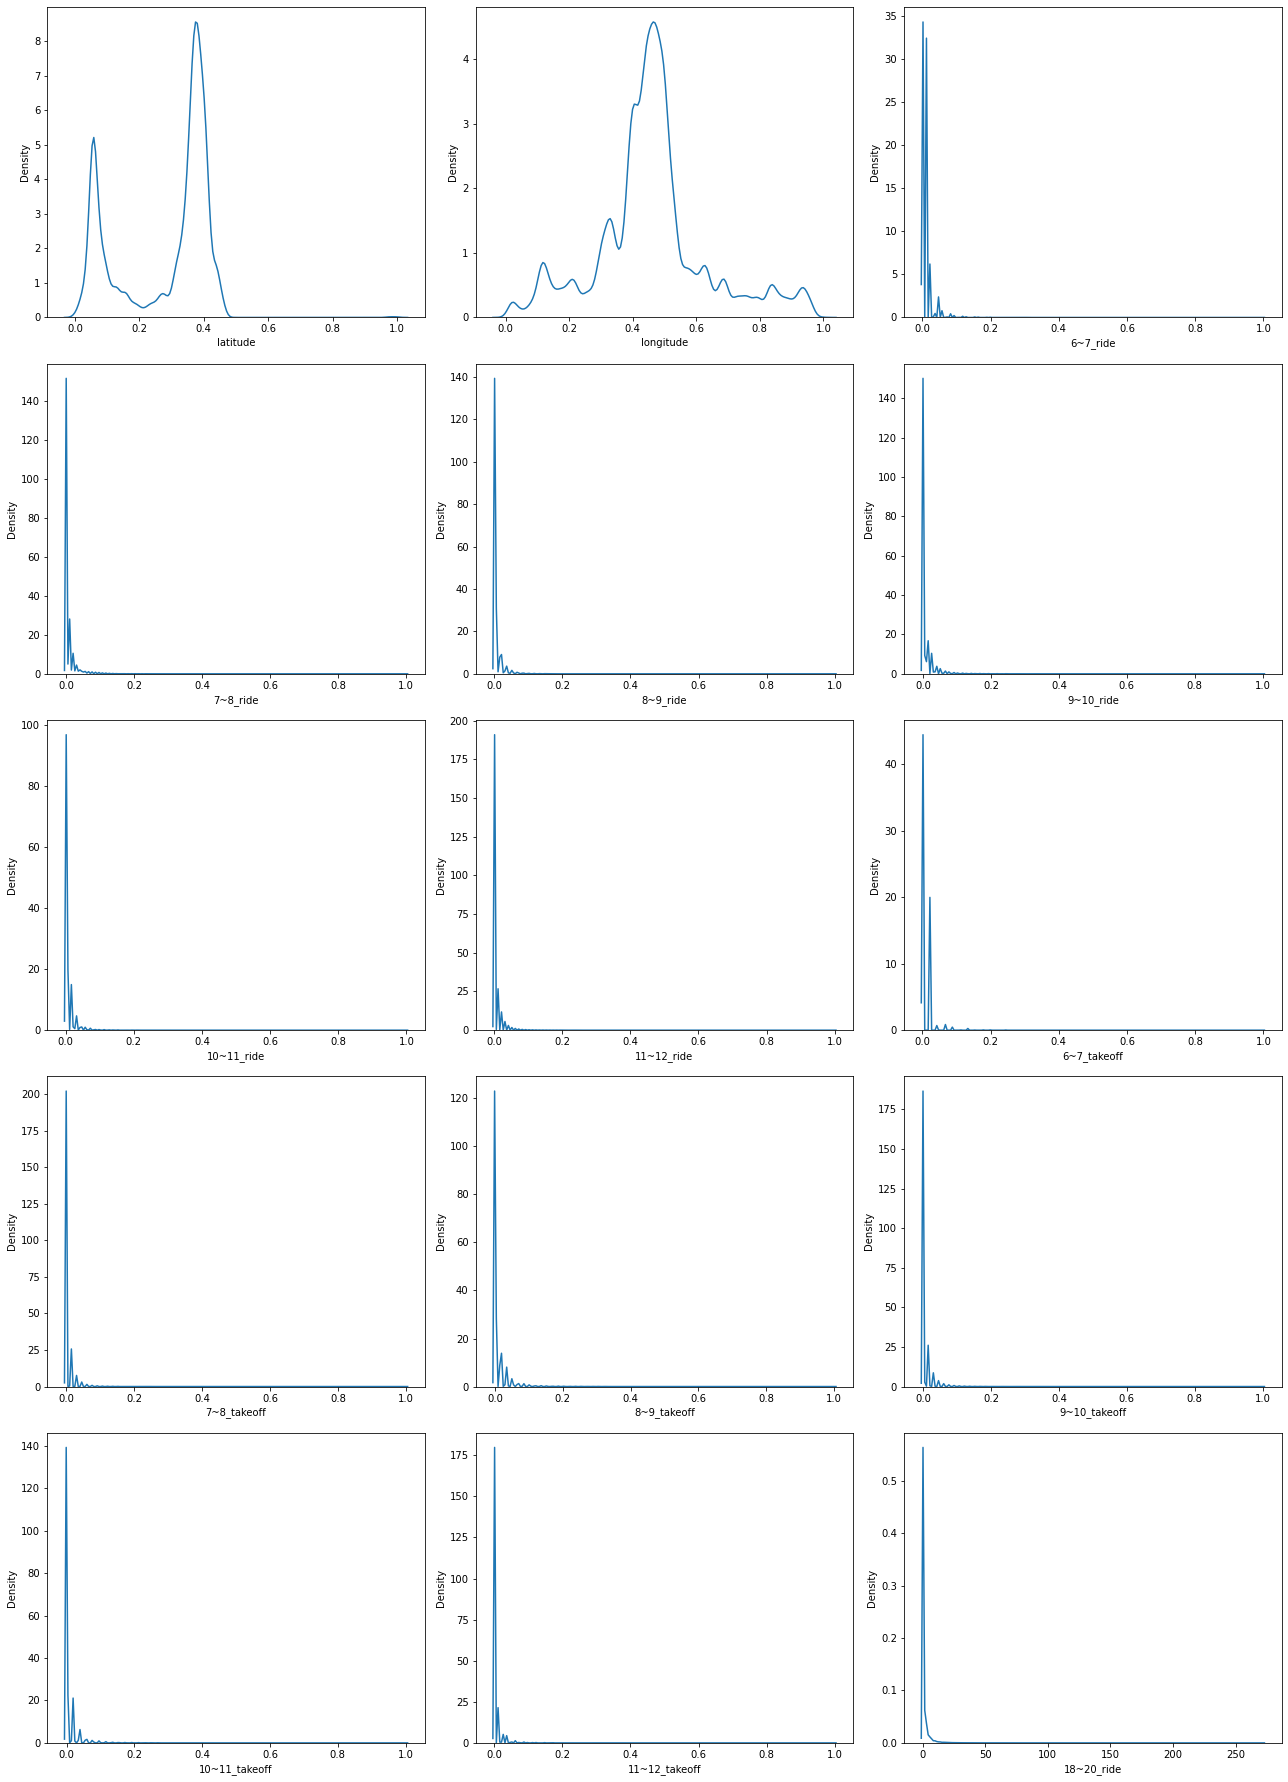

In [16]:
# MinMax 후 수치형 변수 분포
# 분포모양은 바뀌지 않고 최소 최대 값만 0~1로만 바뀜
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 25))

for i in range (5):
    for j in range (3):
        sns.distplot(trainNorm[numerical[i][j]], kde=True, hist=False, ax=axes[i][j])

plt.suptitle('')
plt.tight_layout()
plt.show()

### 로그스케일링

In [17]:
# MinMaxScaler는 스케일링 후 모든 열의 최솟값 0, 최댓값 1로 맞춰지는데 승객 수 예측해야하는 모델에서는 적합하지 않은 것 같음
# 왜도 확인 : 개별 feature 또는 target의 skew가 심하면 log 변환

numerical_col = ['bus_route_id', 'station_code', 'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', 
                 '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', 
                 '11~12_takeoff', '18~20_ride']

print("skewness")
for col in numerical_col:
    print("%s : %.2f" %(col, train[col].skew()))

skewness
bus_route_id : -0.95
station_code : 12.12
latitude : -0.59
longitude : 0.40
6~7_ride : 11.13
7~8_ride : 8.57
8~9_ride : 9.40
9~10_ride : 8.79
10~11_ride : 9.66
11~12_ride : 10.20
6~7_takeoff : 15.62
7~8_takeoff : 11.29
8~9_takeoff : 8.42
9~10_takeoff : 9.10
10~11_takeoff : 9.19
11~12_takeoff : 10.60
18~20_ride : 14.89


#### box-cox로 어느 변환해야할지 확인

reference :   
https://wotres.tistory.com/entry/Box-cox-%EB%B3%80%ED%99%98-in-python  
https://seeyapangpang.tistory.com/35

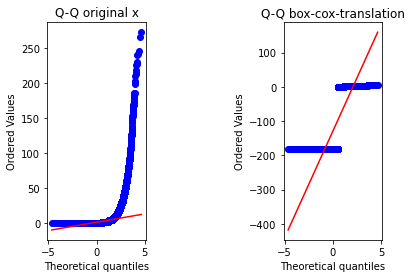

최적의 람다값 :  -0.08768788896343845


In [18]:
from scipy import stats
import matplotlib.pyplot as plt

# 그림판준비
fig = plt.figure()
# 2행 1열의 세부 그림장 생성
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(133)

# log gamma continuous random variable 생성
x = train["18~20_ride"]+0.00000000000001  # boxcox 0 값이 있으면 error -> 더해줌
# Q-Q 플롯 그리기
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_title('Q-Q original x')

# box-cox 변환 사용 => 조금 더 정규화됨
x_trans, optimal_lambda = stats.boxcox(x)
prob = stats.probplot(x_trans, dist=stats.norm, plot=ax2)
ax2.set_title('Q-Q box-cox-translation')
plt.show()

# box-cox 최적의 lambda 값 찾는법
print('최적의 람다값 : ', optimal_lambda)

In [19]:
# 람다값 = 0 이므로 로그변환 
to_log_col = ['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride' ]

In [20]:
# target 인 18~20_ride와 ride, takeoff 변수들 skew 심함 
# -> 18~20_ride를 포함한 모든 ride,takeoff 변수들 로그변환 (station_code는 정류장 고유값 같아서 안함)
for col in to_log_col:
    train[col] = np.log1p(train[col])

In [21]:
# test에는 18~20_ride 없어서 빼고 로그변환
to_log_col = ['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff']

In [22]:
for col in to_log_col:
    test[col] = np.log1p(test[col])

In [23]:
# 로그변환 후 train
train

,date,bus_route_id,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,...,region_south,region_west,dayofwk_mon,dayofwk_sat,dayofwk_sun,dayofwk_thur,dayofwk_tue,dayofwk_wed,holiday_1,inout_out
id,,,,,,,,,,,,,,,,,,,,,
0,2019-09-01,4270000,344,제주썬호텔,33.48990,126.49373,0.000000,0.693147,1.098612,1.791759,...,0,0,0,0,0,0,0,1,0,1
1,2019-09-01,4270000,357,한라병원,33.48944,126.48508,0.693147,1.609438,1.609438,1.098612,...,0,0,0,0,0,0,0,1,0,1
2,2019-09-01,4270000,432,정존마을,33.48181,126.47352,0.693147,0.693147,0.000000,1.098612,...,0,0,0,0,0,0,0,1,0,1
3,2019-09-01,4270000,1579,제주국제공항(600번),33.50577,126.49252,0.000000,2.890372,1.945910,3.295837,...,0,0,0,0,0,0,0,1,0,0
4,2019-09-01,4270000,1646,중문관광단지입구,33.25579,126.41260,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,2019-09-30,32820000,1129,한림환승정류장(한림리),33.41437,126.26336,1.609438,0.000000,0.000000,0.000000,...,0,1,0,0,0,1,0,0,0,0
415419,2019-09-30,32820000,1564,제주시외버스터미널,33.49946,126.51479,1.609438,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
415420,2019-09-30,32820000,2322,해병부대,33.23100,126.26273,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,1,0,0,0,0


In [24]:
numerical = [['latitude', 'longitude', '6~7_ride'], ['7~8_ride', '8~9_ride', '9~10_ride'], ['10~11_ride', '11~12_ride', '6~7_takeoff'], 
             ['7~8_takeoff', '8~9_takeoff', '9~10_takeoff'], ['10~11_takeoff', '11~12_takeoff', '18~20_ride']]

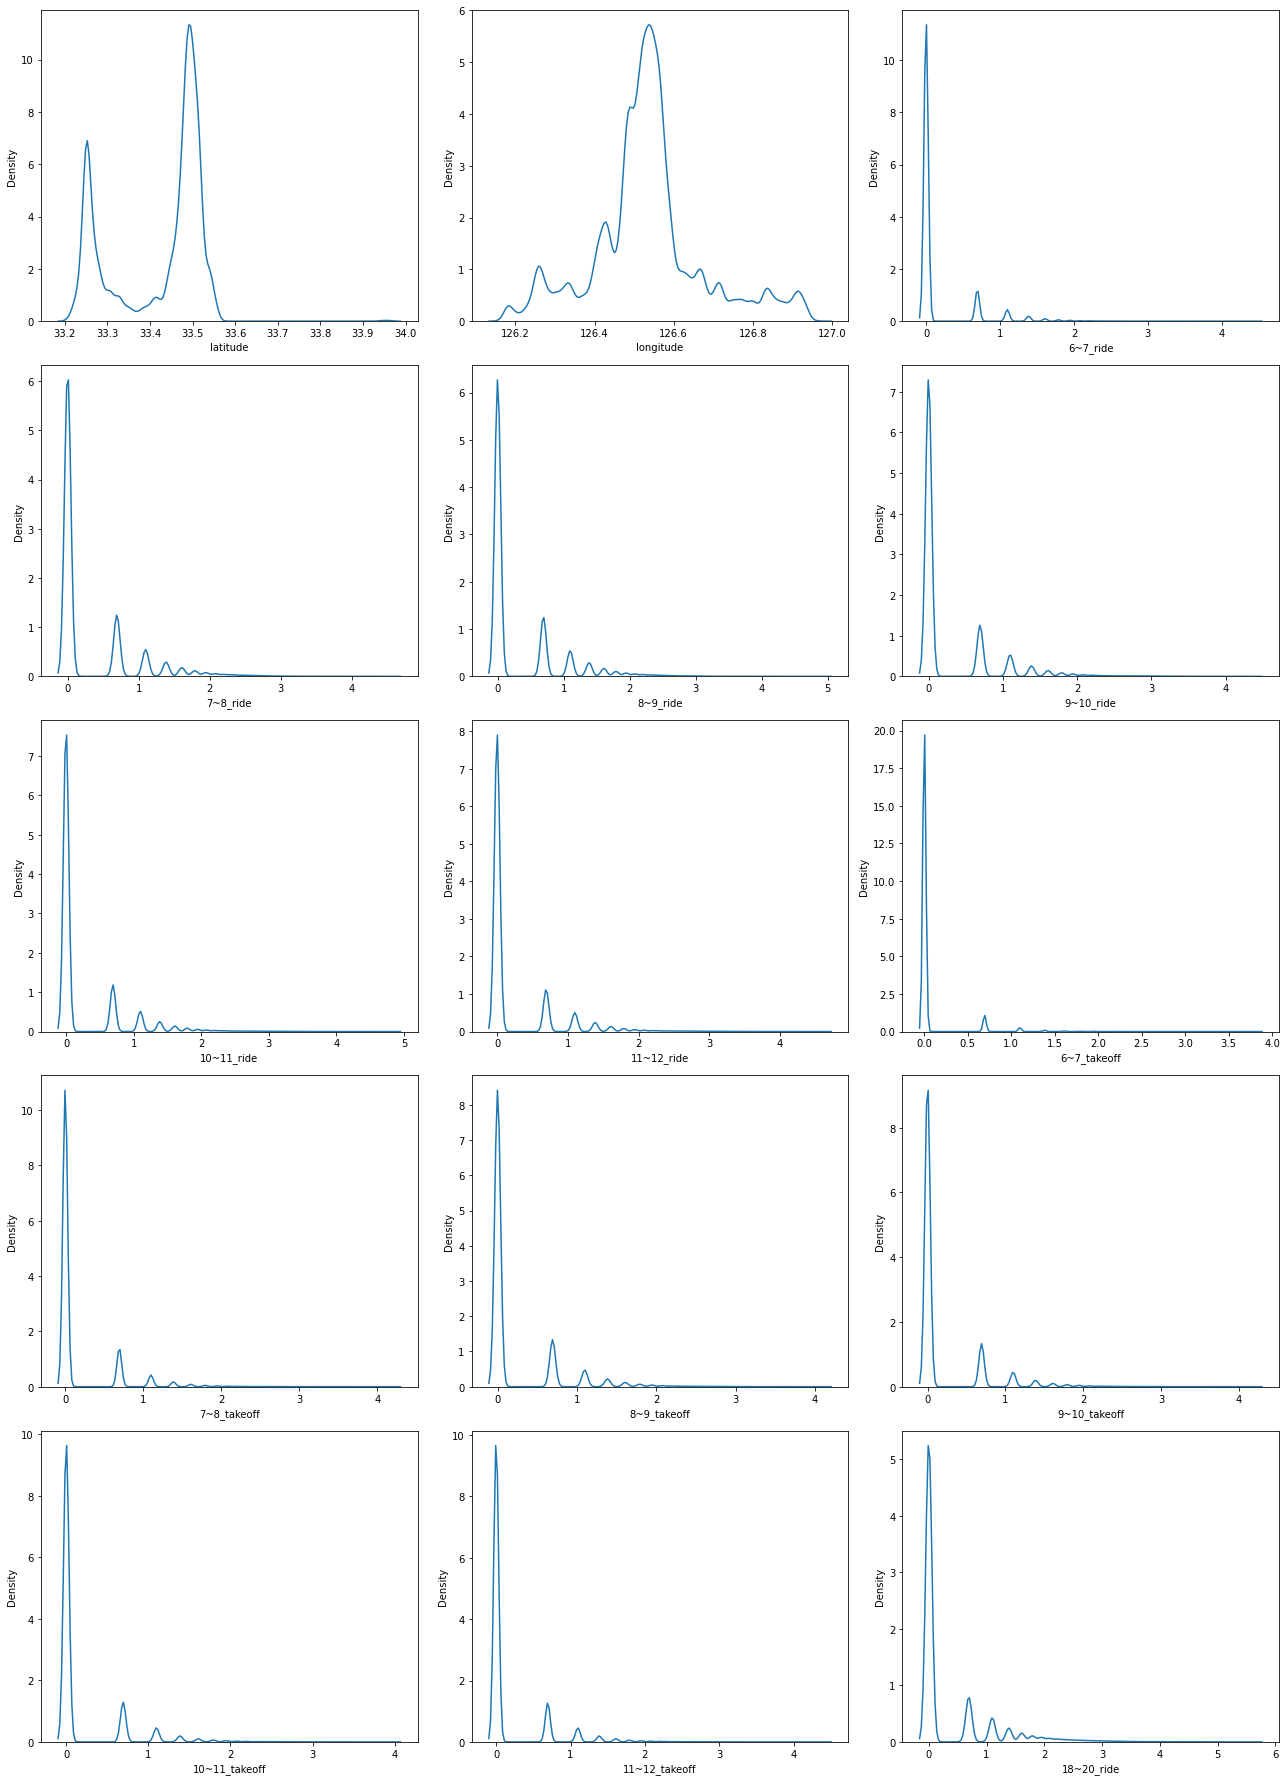

In [25]:
# MinMax 후 수치형 변수 분포
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 25))

for i in range (5):
    for j in range (3):
        sns.distplot(train[numerical[i][j]], kde=True, hist=False, ax=axes[i][j])

plt.suptitle('')
plt.tight_layout()
plt.show()

## 차원 축소

차원축소  
- 범주형 변수 범주 개수 축소   
=> 지역변수: north / north 외 (범주별 박스플롯 확인했을 때 north가 승하차수 많고 그 외 비슷함)  
=> 요일 변수: 요일별 큰 차이 없는 것 같음 (삭제해도 될 듯?)  
=> 휴일 변수: 역시나 큰 차이 없음 (삭제해도 될 듯?)  
- 수치형 변수 상관관계  
=> 상관계수 히트맵 확인했을 때 수치형 변수 간에 상관관계 크게 높은 변수들 없었음  
- 수치형 변수 PCA(주성분 분석)

### 범주형 변수 범주 개수 축소

In [26]:
## 지역변수 north만 남겨두기
train = train.drop(columns=["region_other", "region_south", "region_west"])
test = test.drop(columns=["region_other", "region_south", "region_west"])
## 요일변수 삭제
# train = train.drop(columns=['dayofwk_mon', 'dayofwk_sat', 'dayofwk_sun', 'dayofwk_thur', 'dayofwk_tue', 'dayofwk_wed'])
# test = test.drop(columns=['dayofwk_mon', 'dayofwk_sat', 'dayofwk_sun', 'dayofwk_thur', 'dayofwk_tue', 'dayofwk_wed'])
## 휴일변수 삭제
# test = train.drop(columns=['holiday_1'])
# test = test.drop(columns=['holiday_1'])

### 수치형 변수 주성분 분석 (PCA)

**주성분 분석 (PCA)**  
데이터가 같은 스케일로 측정되고, 상관관계가 높은 측정치들을 포함할 때 특히 유용  
원래변수들을 가중선형결합으로 재표현하여 소수(보통 3개)의 변수들을 새롭게 생성, 원래 데이터세트가 가지고 있는 정보의 대부분을 유지함

In [27]:
train.columns

Index(['date', 'bus_route_id', 'station_code', 'station_name', 'latitude',
       'longitude', '6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
       '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
       '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride',
       'weather', 'bus_route_class', 'region_north', 'dayofwk_mon',
       'dayofwk_sat', 'dayofwk_sun', 'dayofwk_thur', 'dayofwk_tue',
       'dayofwk_wed', 'holiday_1', 'inout_out'],
      dtype='object')

In [29]:
# 수치형 변수 중 bus_route_id, latitude, longitude는 이에 따른 범주형 변수 만들었으므로 column 삭제
train = train.drop(columns=["bus_route_id", "latitude", "longitude"])
test = test.drop(columns=["bus_route_id", "latitude", "longitude"])

In [30]:
# station_code는 정류장 고유값이므로 수치형 변수는 오직 ride, takeoff 데이터만 취급하고 pca 하겠음, 스케일도 비슷함 
numerical = ['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
             '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride']

<AxesSubplot:>

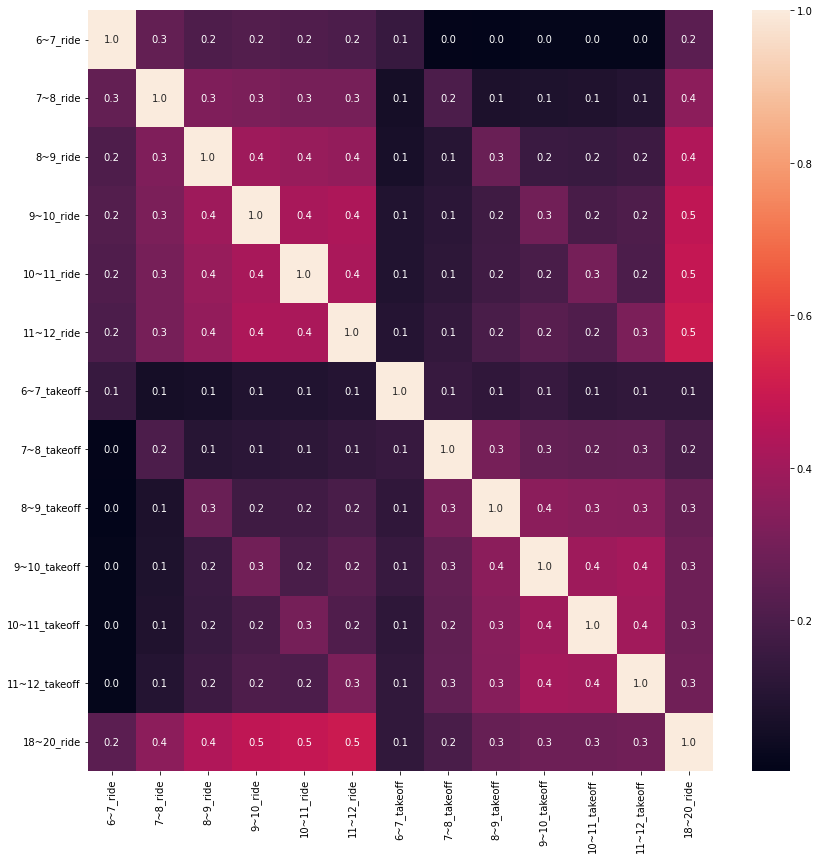

In [35]:
# 상관관계 확인 -> 높지는 않음
corr = train[numerical].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt=".1f")

In [31]:
from sklearn.decomposition import PCA

In [49]:
X = train[['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
             '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride']]
y = train["18~20_ride"]

In [50]:
pcs = PCA()
pcs.fit(X)

PCA()

In [51]:
pcsSummary = pd.DataFrame({"standarde deviation": np.sqrt(pcs.explained_variance_),
                            "proportion of varicance": pcs.explained_variance_ratio_,
                            "cumulative proportion": np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns =['PC{}'.format(i) for i in range(1, len(pcsSummary.columns)+1)]
pcsSummary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
standarde deviation,1.0855,0.6180,0.5079,0.4877,0.4475,0.4180,0.4040,0.3717,0.3617,0.3475,0.3330,0.3253,0.2312
proportion of varicance,0.3621,0.1173,0.0793,0.0731,0.0615,0.0537,0.0501,0.0425,0.0402,0.0371,0.0341,0.0325,0.0164
cumulative proportion,0.3621,0.4795,0.5587,0.6318,0.6934,0.7471,0.7972,0.8397,0.8799,0.9170,0.9511,0.9836,1.0000


상관관계가 높지 않아서 그런지 총 변동의 90% 이상 설명하기 위해서는 10개의 주성분 필요, 큰 차이는 없는 듯 함

In [52]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary.columns, index = X.columns)
pcsComponents_df.iloc[:,:10]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
6~7_ride,0.113069,-0.194964,0.006068,-0.032066,0.038272,-0.001658,-0.001811,-0.159832,0.933533,0.156887
7~8_ride,0.304381,-0.462284,0.766363,-0.173794,-0.013977,0.015706,0.001045,0.096345,-0.082209,-0.242332
8~9_ride,0.360615,-0.183669,-0.058517,0.840269,-0.067307,0.024557,0.052335,0.306207,-0.020125,0.152453
9~10_ride,0.335073,-0.096754,-0.155071,-0.020988,0.556474,-0.508889,-0.375380,-0.189097,-0.127432,0.006115
10~11_ride,0.323076,-0.071580,-0.183626,-0.088479,0.295627,0.743251,-0.212036,-0.183489,-0.099564,0.036060
11~12_ride,0.324627,-0.033211,-0.156227,-0.126154,0.226327,-0.047733,0.800035,-0.216491,-0.088672,0.007473
6~7_takeoff,0.039559,0.046905,0.027595,-0.019949,-0.006519,-0.009552,-0.005779,-0.032500,0.147103,0.088786
7~8_takeoff,0.116287,0.211618,0.347354,-0.058988,-0.118974,-0.016451,-0.046024,-0.228809,-0.165004,0.843939
8~9_takeoff,0.190067,0.443170,0.219188,0.322643,-0.219833,-0.016949,-0.046272,-0.631104,0.043124,-0.401942
9~10_takeoff,0.181385,0.405986,0.110002,-0.066825,0.206582,-0.237467,-0.154404,0.305228,0.127450,-0.041745


가중치 검토해봤을 때 첫번째 주성분 : 모든 시간대 ride, takeoff 높을 수록 18~20_ride가 높음   
-> 주성분 분석이 크게 효과 있는 것 같지는 않음

In [53]:
# 지금까지 전처리 완료된 데이터셋 저장 
train.to_csv("C:/Users/kimch/Desktop/229255_bus_riders_at_rush_hour_data/pre3_train")
test.to_csv("C:/Users/kimch/Desktop/229255_bus_riders_at_rush_hour_data/pre3_test")

**다음 주**  
1. 변수 선택 + a -> 최종 데이터셋 만들기  
2. 간단한 모델에 돌려보기 -> 다중 선형 회귀, 릿지 회귀(, k-최근접이웃 회귀, 분류나무) -> 최종 데이터셋 선정
3. 돌릴 수 있는 모델 공부해오기

**앞으로 계획**  
~ 2/2 데이터전처리(스케일링, 인코딩, 변수선택)  
~ 2/8 마지막 전처리 후 각자 최종 데이터셋 만들어서 간단한 모델 돌려오기, 돌릴 수 있는 모델 찾고 공부해오기 -> 2/8에 최최종 데이터셋 선정   
~ 2/15 모델 적합 + 파라미터 튜닝  
~ 2/22 모델 적합 + 파라미터 튜닝   
~ 2/27 ppt+발표 준비